In [2]:
import numpy as np
import matplotlib.pyplot as plt

from stlpy.benchmarks import NonlinearReachAvoid
from stlpy.solvers import *

         Install drake (https://drake.mit.edu/installation.html)
         to use the Drake-based solvers.


In [3]:
# Specification Parameters
goal = (7.5, 8.5)  # goal center and radius
goal_rad = 0.75
obs = (3.5, 5)     # obstacle center and radius
obs_rad = 1.5
T = 15

# Define the system and specification
scenario = NonlinearReachAvoid(goal, goal_rad, obs, obs_rad, T)
spec = scenario.GetSpecification()
sys = scenario.GetSystem()

# Specify any additional running cost (this helps the numerics in
# a gradient-based method)
Q = np.diag([0,0,0])
R = 1e-3*np.eye(2)

# Initial state
x0 = np.array([1.0,2.0,0])

In [5]:
# Choose a solver
#solver = DrakeSmoothSolver(spec, sys, x0, T, k=2.0)
solver = ScipyGradientSolver(spec, sys, x0, T)

# Set bounds on state and control variables
u_min = np.array([0,-5.0])
u_max = np.array([10, 5.0])
x_min = np.array([-10.0, -10.0, -2*np.pi])
x_max = np.array([10.0, 10.0, 2*np.pi])
#solver.AddControlBounds(u_min, u_max)
#solver.AddStateBounds(x_min, x_max)

# Add quadratic running cost (optional)
solver.AddQuadraticCost(Q,R)

# Solve the optimization problem
x, u, _, _ = solver.Solve()

Optimization terminated successfully
Solve Time:  0.5317032337188721
Optimal robustness:  0.5542115010517382


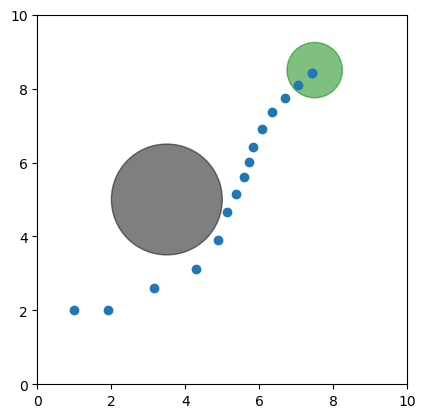

In [6]:

if x is not None:
    # Plot the solution
    ax = plt.gca()
    scenario.add_to_plot(ax)
    plt.scatter(*x[:2,:])
    plt.show()